In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes = True)

In [2]:
from scipy.stats import bernoulli

[Text(0.5, 0, 'Bernoulli Distribution'), Text(0, 0.5, 'Frequency')]

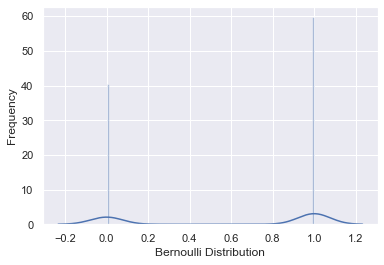

In [4]:
data_bern = bernoulli.rvs(size=10000, p=0.6)
ax = sns.distplot(data_bern, bins=100, kde=True)
ax.set(xlabel="Bernoulli Distribution", ylabel='Frequency')

In [5]:
from scipy.stats import binom

C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


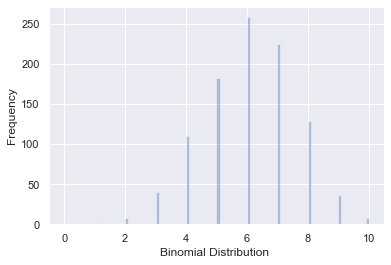

In [6]:
data_binom = binom.rvs(n=10, p=0.6, size=1000)
ax = sns.distplot(data_binom,
                  bins=100,
                  kde=False,
                 )
_ = ax.set(xlabel='Binomial Distribution ', ylabel='Frequency')

In [8]:
from scipy.stats import uniform

[Text(0.5, 0, 'Uniform Distribution'), Text(0, 0.5, 'Frequency')]

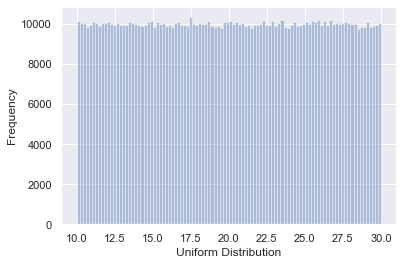

In [10]:
n = 10000
n *=100
start =10
width=20

data_uniform = uniform.rvs(size=n,loc=start,scale=width)
ax=sns.distplot(data_uniform,bins=100,kde=False)
ax.set(xlabel='Uniform Distribution', ylabel='Frequency')

In [11]:
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize

figsize(16,6)

In [12]:
sleep_data=pd.read_csv('data/sleep_data.csv')

In [13]:
sleep_data

,Unnamed: 0,indicator,time_offset
0,2017-12-01 21:00:00,0,-60
1,2017-12-01 21:01:00,0,-59
2,2017-12-01 21:02:00,0,-58
3,2017-12-01 21:03:00,0,-57
4,2017-12-01 21:04:00,0,-56
...,...,...,...
11335,2018-02-01 23:55:00,1,115
11336,2018-02-01 23:56:00,1,116
11337,2018-02-01 23:57:00,1,117
11338,2018-02-01 23:58:00,1,118


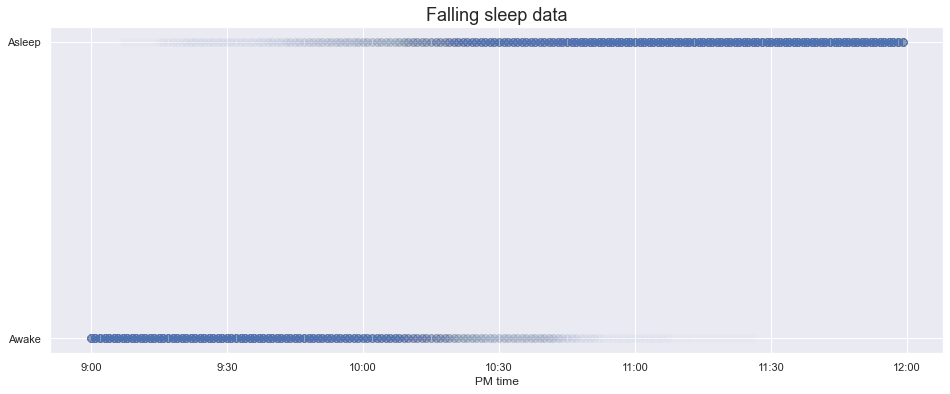

In [15]:
sleep_labels=['9:00','9:30','10:00','10:30','11:00','11:30','12:00']
plt.scatter(sleep_data['time_offset'],sleep_data['indicator'],s=60,alpha=0.01,facecolor='b',edgecolor='b')

plt.yticks([0,1],['Awake','Asleep']);plt.xlabel('PM time')
plt.title('Falling sleep data',size=18)
plt.xticks([-60,-30,0,30,60,90,120],sleep_labels);

In [16]:
sleep_data.sort_values('time_offset', inplace=True)
time = np.array(sleep_data.loc[:,'time_offset'])
sleep_obs = np.array(sleep_data.loc[:,'indicator'])

In [17]:
sleep_obs

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [18]:
time

array([-60, -60, -60, ..., 119, 119, 119], dtype=int64)

In [19]:
sleep_data

,Unnamed: 0,indicator,time_offset
0,2017-12-01 21:00:00,0,-60
4320,2017-12-25 21:00:00,0,-60
1260,2017-12-08 21:00:00,0,-60
10080,2018-01-26 21:00:00,0,-60
6840,2018-01-08 21:00:00,0,-60
...,...,...,...
8999,2018-01-19 23:59:00,1,119
2159,2017-12-12 23:59:00,1,119
9179,2018-01-20 23:59:00,1,119
5579,2017-12-31 23:59:00,1,119


In [20]:
sleep_obs[3260:3275]

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [21]:
time_offset=15

In [22]:
awake_vals = sleep_data.loc[(sleep_data['time_offset']==time_offset)
                           &(sleep_data['indicator']==0)]

In [23]:
sleep_vals = sleep_data.loc[(sleep_data['time_offset'] == time_offset) 
                            & (sleep_data['indicator'] == 1)]

In [24]:
print(len(sleep_vals), len(awake_vals))

31 32


In [25]:
p_sleep_at_offset=len(sleep_vals)/(len(sleep_vals)+len(awake_vals))

In [26]:
p_sleep_at_offset

0.49206349206349204

In [27]:
alpha = 0.977400
beta = -0.067270

def calculate_prior(time, alpha, beta):
    p = 1.0 / (1.0 + np.exp(np.dot(beta, time) + alpha))
    return p

 
time_est = np.linspace(time.min()- 5, time.max() + 5, 1000)[:, None]


sleep_est = calculate_prior(time_est, alpha, beta)

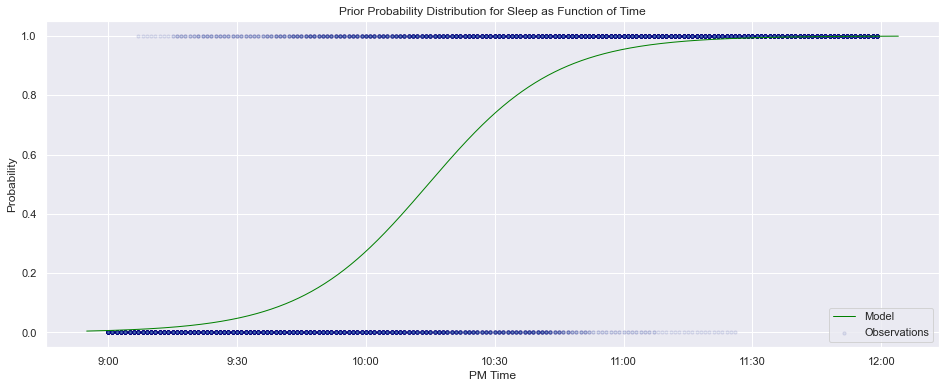

In [28]:
plt.plot(time_est,sleep_est,color='green',lw=1,label="Model")
plt.scatter(time,sleep_obs,edgecolor='navy',s=10,alpha=0.1,label='Observations')
plt.title('Prior Probability Distribution for Sleep as Function of Time');
plt.legend()
plt.ylabel('Probability')
plt.xlabel('PM Time');
plt.xticks([-60, -30, 0, 30, 60, 90, 120], sleep_labels);

In [30]:
print('9:30  PM probability of being asleep: {:.2f}%.'.
      format(100 * calculate_prior(-30, alpha, beta)))
print('10:00 PM probability of being asleep: {:.2f}%.'.
      format(100 * calculate_prior(0, alpha, beta)))
print('10:30 PM probability of being asleep: {:.2f}%.'.
      format(100 * calculate_prior(15, alpha, beta)))

9:30  PM probability of being asleep: 4.76%.
10:00 PM probability of being asleep: 27.34%.
10:30 PM probability of being asleep: 50.79%.
